In [7]:
import pickle
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [8]:
os.chdir("C:\\Users\\Goos\\Documents\\projectOBP\\meal-delivery-routing-2024")

In [9]:
def import_pickle_file(file_path):
    with open(file_path, 'rb') as pickle_file:
        return pickle.load(pickle_file)
    
def import_json_file(file_path):
    with open(file_path, 'r') as file:
        restaurant_json = json.load(file)
    return restaurant_json

def export_pickle_file(dictionary, file_path):
    with open(file_path, 'wb') as pickle_file:
        pickle.dump(dictionary, pickle_file)
        
def export_json_file(dictionary, file_path, seralize=False):
    if seralize == False:
        json_data = json.dumps(dictionary, indent=2)
        with open(file_path, 'w') as file:
            file.write(json_data)
    else:
        with open(file_path, 'w') as json_file:
            json.dump(dictionary, json_file, indent=2, default=serialize_restaurant)

def day_to_position(day):
    if day == "Monday":
        return 0
    elif day == "Tuesday":
        return 1
    elif day == "Wednesday":
        return 2
    elif day == "Thursday":
        return 3
    elif day == "Friday":
        return 4
    elif day == "Saturday":
        return 5
    else:
        return 6

In [10]:
# order_duration = import_pickle_file("order_durations.pickle") 
# order_velocity = import_pickle_file("orders_per_hour_per_vehicle.pickle")
# total_orders = import_pickle_file("total_orders_with_amount_vehicles.pickle")
restaurant_data = import_json_file("data\\restaurant_data_v2.json")
order_velocity = import_pickle_file("data\\order_velocity.pickle")

In [12]:
data_dict = dict()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    total_res_open = 0
    for res_num, res_info in restaurant_data.items():
        if res_info["operating days"][day_to_position(day)] == 1:
            total_res_open += 1
    data_dict[day] = total_res_open
data_dict

{'Monday': 17,
 'Tuesday': 22,
 'Wednesday': 34,
 'Thursday': 34,
 'Friday': 34,
 'Saturday': 22,
 'Sunday': 37}

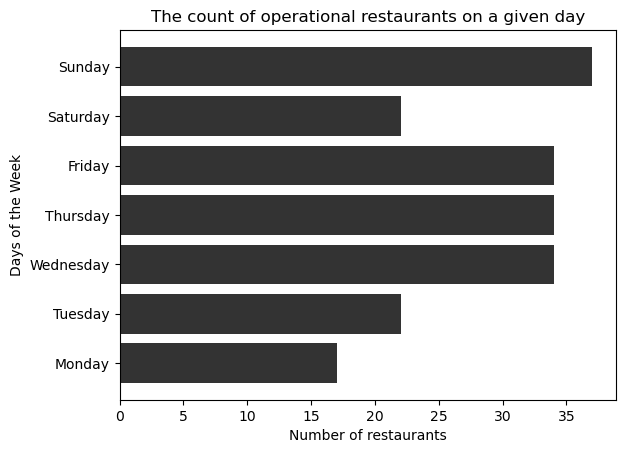

In [20]:
def plot_horizontal_histogram(data_dict):
    days = list(data_dict.keys())
    frequencies = list(data_dict.values())

    plt.barh(days, frequencies, color='black', alpha=0.8)
    plt.xlabel('Number of restaurants')
    plt.ylabel('Days of the Week')
    plt.title('The count of operational restaurants on a given day')
    plt.show()

plot_horizontal_histogram(data_dict)

In [73]:
order_velocity[1]

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_dict = {key: [] for key in days_of_week}


count = 0
for date, values in order_velocity[1].items():
    date_object = datetime(2023, date[0], date[1])
    day_of_week_string = date_object.strftime('%A')
    day_dict[day_of_week_string].append(values)   

12

In [15]:
hour_list = list(range(9, 24))
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
vehicle_list = list(range(1,21))
memory_dict = {key: None for key in vehicle_list}
for key in memory_dict.keys():
    memory_dict[key] = {key: {} for key in days_of_week}


for vehicle in vehicle_list:
    day_dict = {key: [] for key in days_of_week}
    hour_dict = {key: [] for key in hour_list}

    count = 0
    for date, values in order_velocity[vehicle].items():
        date_object = datetime(2023, date[0], date[1])
        day_of_week_string = date_object.strftime('%A')
        day_dict[day_of_week_string].append(values)  

    for day in days_of_week:
        for values in day_dict[day]:
            for value in values:
                hour_dict[value[0]].append(value[1])

        for hour in hour_list:
            if len(hour_dict[hour]) == 0:
                memory_dict[vehicle][day][hour] = 0
            else:
                memory_dict[vehicle][day][hour] = np.mean(hour_dict[hour])

        
export_json_file(memory_dict, "order_velocity_means.json")

In [14]:
memory_dict[1]

{'Monday': {9: 0,
  10: 0,
  11: 0,
  12: 2.5454545454545454,
  13: 6.333333333333333,
  14: 7.666666666666667,
  15: 4.166666666666667,
  16: 3.6666666666666665,
  17: 6.333333333333333,
  18: 6.833333333333333,
  19: 8.5,
  20: 10.666666666666666,
  21: 8.666666666666666,
  22: 4.333333333333333,
  23: 0.5833333333333334},
 'Tuesday': {9: 0,
  10: 0,
  11: 0,
  12: 3.3043478260869565,
  13: 6.666666666666667,
  14: 9.25,
  15: 7.875,
  16: 7.25,
  17: 9.666666666666666,
  18: 10.708333333333334,
  19: 13.0,
  20: 15.583333333333334,
  21: 12.958333333333334,
  22: 6.041666666666667,
  23: 1.4166666666666667},
 'Wednesday': {9: 0,
  10: 0,
  11: 0,
  12: 4.6571428571428575,
  13: 10.194444444444445,
  14: 14.13888888888889,
  15: 12.63888888888889,
  16: 11.88888888888889,
  17: 14.222222222222221,
  18: 17.38888888888889,
  19: 21.166666666666668,
  20: 23.77777777777778,
  21: 19.11111111111111,
  22: 10.11111111111111,
  23: 2.9722222222222223},
 'Thursday': {9: 0,
  10: 0,
  11: 0

In [107]:
for day, values in day_dict.items():
    plt.plot(list(values.keys()), list(values.values()), label=day)

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Value')
plt.title('Values for Each Day of the Week')
plt.legend(loc='upper left')

# Display the plot
plt.show()

AttributeError: 'list' object has no attribute 'keys'

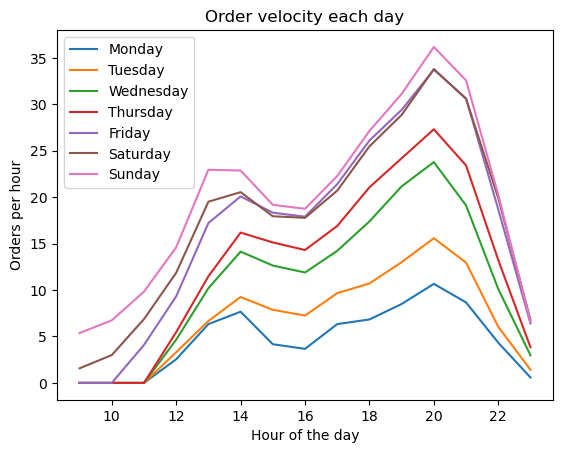

In [109]:
import matplotlib.pyplot as plt

# Your data
day_dict = {
    'Monday': {9: 0, 10: 0, 11: 0, 12: 2.5454545454545454, 13: 6.333333333333333, 14: 7.666666666666667, 15: 4.166666666666667, 16: 3.6666666666666665, 17: 6.333333333333333, 18: 6.833333333333333, 19: 8.5, 20: 10.666666666666666, 21: 8.666666666666666, 22: 4.333333333333333, 23: 0.5833333333333334},
    'Tuesday': {9: 0, 10: 0, 11: 0, 12: 3.3043478260869565, 13: 6.666666666666667, 14: 9.25, 15: 7.875, 16: 7.25, 17: 9.666666666666666, 18: 10.708333333333334, 19: 13.0, 20: 15.583333333333334, 21: 12.958333333333334, 22: 6.041666666666667, 23: 1.4166666666666667},
    'Wednesday': {9: 0, 10: 0, 11: 0, 12: 4.6571428571428575, 13: 10.194444444444445, 14: 14.13888888888889, 15: 12.63888888888889, 16: 11.88888888888889, 17: 14.222222222222221, 18: 17.38888888888889, 19: 21.166666666666668, 20: 23.77777777777778, 21: 19.11111111111111, 22: 10.11111111111111, 23: 2.9722222222222223},
    'Thursday': {9: 0, 10: 0, 11: 0, 12: 5.468085106382978, 13: 11.479166666666666, 14: 16.1875, 15: 15.125, 16: 14.3125, 17: 16.895833333333332, 18: 21.0625, 19: 24.1875, 20: 27.3125, 21: 23.416666666666668, 22: 13.229166666666666, 23: 3.8333333333333335},
    'Friday': {9: 0, 10: 0, 11: 4.090909090909091, 12: 9.322033898305085, 13: 17.216666666666665, 14: 20.083333333333332, 15: 18.333333333333332, 16: 17.9, 17: 21.4, 18: 26.1, 19: 29.4, 20: 33.733333333333334, 21: 30.633333333333333, 22: 18.683333333333334, 23: 6.4},
    'Saturday': {9: 1.5714285714285714, 10: 3.0, 11: 6.869565217391305, 12: 11.859154929577464, 13: 19.51388888888889, 14: 20.541666666666668, 15: 17.944444444444443, 16: 17.77777777777778, 17: 20.708333333333332, 18: 25.47222222222222, 19: 28.86111111111111, 20: 33.791666666666664, 21: 30.583333333333332, 22: 19.90277777777778, 23: 6.791666666666667},
    'Sunday': {9: 5.368421052631579, 10: 6.739130434782608, 11: 9.82857142857143, 12: 14.602409638554217, 13: 22.952380952380953, 14: 22.86904761904762, 15: 19.178571428571427, 16: 18.75, 17: 22.273809523809526, 18: 27.13095238095238, 19: 31.11904761904762, 20: 36.17857142857143, 21: 32.57142857142857, 22: 20.25, 23: 6.571428571428571}
}

# Plotting
for day, values in day_dict.items():
    plt.plot(list(values.keys()), list(values.values()), label=day)

# Adding labels and title
plt.xlabel('Hour of the day')
plt.ylabel('Orders per hour')
plt.title('Order velocity each day')
plt.legend(loc='upper left')

# Display the plot
plt.show()
